# Does climate change affect hurricanes?
### *The climate of the Netherlands has specifically considered.*

##### In this notebook I have focused on visualization to achieve the Answer

##### And also I have used two datasets: (You can see details of each dataset in links below)   
##### [1) Global annual Temperature](https://datahub.io/core/global-temp)
##### [2) Historical weather in the Netherlands 1901-2018](https://www.kaggle.com/datasets/sinaasappel/historical-weather-in-the-netherlands-19012018)

In [1]:
#importing libraries and first dataset: Weather in Netherlands
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('KNMI_20181231.csv')
df.head()

<ipython-input-1-34f0e14710d2>:5: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('KNMI_20181231.csv')


,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,209,20010130,,,,,,,,,...,,,,,,,,,,
1,209,20010131,,,,,,,,,...,,,,,,,,,,
2,209,20010201,236,13,24,50,8,10,1,90,...,,,,,,,,,,
3,209,20010202,150,46,58,80,9,10,3,100,...,,,,,,,,,,
4,209,20010203,106,65,66,90,8,50,1,120,...,,,,,,,,,,


In [2]:
# strip all columns name to avoid random errors
df.columns = [x.strip() for x in df.columns]
df.columns

Index(['STN', 'YYYYMMDD', 'DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH',
       'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ',
       'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'PG', 'PX', 'PXH', 'PN', 'PNH',
       'VVN', 'VVNH', 'VVX', 'VVXH', 'NG', 'UG', 'UX', 'UXH', 'UN', 'UNH',
       'EV24'],
      dtype='object')

##### Let's choose some columns that we need, and rename it!

In [3]:
cols = ['YYYYMMDD','FXX','TG']
df = df[cols]
df.columns = ['date','highwind','avtemp']
df.head()

,date,highwind,avtemp
0,20010130,,
1,20010131,,
2,20010201,90,
3,20010202,100,
4,20010203,120,


In [4]:
#Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

<ipython-input-4-af49f5ff2927>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')


,date,highwind,avtemp
0,2001-01-30,,
1,2001-01-31,,
2,2001-02-01,90,
3,2001-02-02,100,
4,2001-02-03,120,


##### Replace all whitespaces and empty cells with np.NaN

In [5]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head()

,date,highwind,avtemp
0,2001-01-30,NaN,NaN
1,2001-01-31,NaN,NaN
2,2001-02-01,90,NaN
3,2001-02-02,100,NaN
4,2001-02-03,120,NaN


In [6]:
#check columns data type
print(df.dtypes)

date        datetime64[ns]
highwind            object
avtemp              object
dtype: object


##### Columns 'avtemp' and 'highwind' has mixed data types so indicated as object dtype.   
##### We have to change it to numeric type

In [7]:
df['avtemp'] = pd.to_numeric(df['avtemp'])
df['highwind'] = pd.to_numeric(df['highwind'])

In [8]:
#check columns data type again
print(df.dtypes)

date        datetime64[ns]
highwind           float64
avtemp             float64
dtype: object


##### This dataset has daily freq but we want it to be annual, so we group data with year frequency and compute meanTemperature in Year and max of wind speed in Year.


In [9]:
group = []
meanTemp = []
maxWind=[]
for gp , frame in df.set_index('date').groupby(pd.Grouper(freq="Y")):
    group.append(gp)
    # because the temp measured as 0.1 C and
    # it has to be 1C so i devide it by 10
    meanTemp.append(np.nanmean(frame['avtemp'])/10)
    # the same as temp, wind speed measured as 0.1 m/s
    maxWind.append( np.max(frame['highwind'])/10)
    
annualNetherlands = pd.DataFrame({'date':group ,
                                  'meanTemp':meanTemp, 'meanwind':maxWind})
# Sort Values By date column
annualNetherlands.sort_values(by='date', inplace=True)
annualNetherlands

,date,meanTemp,meanwind
0,1901-12-31,8.783562,NaN
1,1902-12-31,8.245205,NaN
2,1903-12-31,9.166575,NaN
3,1904-12-31,8.933607,NaN
4,1905-12-31,8.713699,NaN
...,...,...,...
113,2014-12-31,11.586390,47.0
114,2015-12-31,10.757211,37.0
115,2016-12-31,10.594000,47.0
116,2017-12-31,10.868264,35.0


##### *This Dataframe is pretty much ready, So let's work on global temperature Dataset.*   
#####  This Global temperature dataset just provides a comparison between global warming with Netherlands warming on visualization

In [10]:
# Read global temp dataset
glob = pd.read_csv('annual_csv.csv')
glob.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408


In [11]:
#Converting 'date' column to datetime format
glob['Year'] = pd.to_datetime(glob['Year'] , format='%Y')

In [12]:
# sort values by date column
glob.sort_values(by='Year',inplace=True)
glob.head()

,Source,Year,Mean
273,GISTEMP,1880-01-01,-0.2000
272,GCAG,1880-01-01,-0.1148
270,GCAG,1881-01-01,-0.0628
271,GISTEMP,1881-01-01,-0.1200
268,GCAG,1882-01-01,-0.0648


##### This df is ready too...
##### But still one thing is remains; I also want to have a 10 yearly average on my plots to have a better understanding...    
##### So let's create 10yearly mean dataframes

In [13]:
#create a 10 yearly df: Netherlands
group=[]
meanTemp=[]
meanWind=[]
for gp , frame in annualNetherlands.set_index('date').groupby(pd.Grouper(freq="10Y")):
    group.append(gp)
    meanTemp.append(np.nanmean(frame['meanTemp']))
    meanWind.append( np.nanmean(frame['meanwind']))
    
tenyearavg = pd.DataFrame({'date':group , 'meanTemp':meanTemp,
                           'meanwind':meanWind})
tenyearavg.head()

<ipython-input-13-89b6bc2b252d>:8: RuntimeWarning: Mean of empty slice
  meanWind.append( np.nanmean(frame['meanwind']))


,date,meanTemp,meanwind
0,1901-12-31,8.783562,NaN
1,1911-12-31,8.895658,NaN
2,1921-12-31,9.121281,NaN
3,1931-12-31,8.900067,NaN
4,1941-12-31,9.233936,NaN


In [14]:
#create a 10 yearly df: Netherlands
group=[]
meanTemp=[]
for gp, frame in glob.set_index('Year').groupby(pd.Grouper(freq='10Y')):
    group.append(gp)
    meanTemp.append(np.nanmean(frame['Mean']))

globalTenYear = pd.DataFrame({'Year':group , 'Mean':meanTemp})
globalTenYear.head()

,Year,Mean
0,1880-12-31,-0.157400
1,1890-12-31,-0.202995
2,1900-12-31,-0.208500
3,1910-12-31,-0.335500
4,1920-12-31,-0.270450


##### Now dataframes are ready!!
##### Let's Plot them...

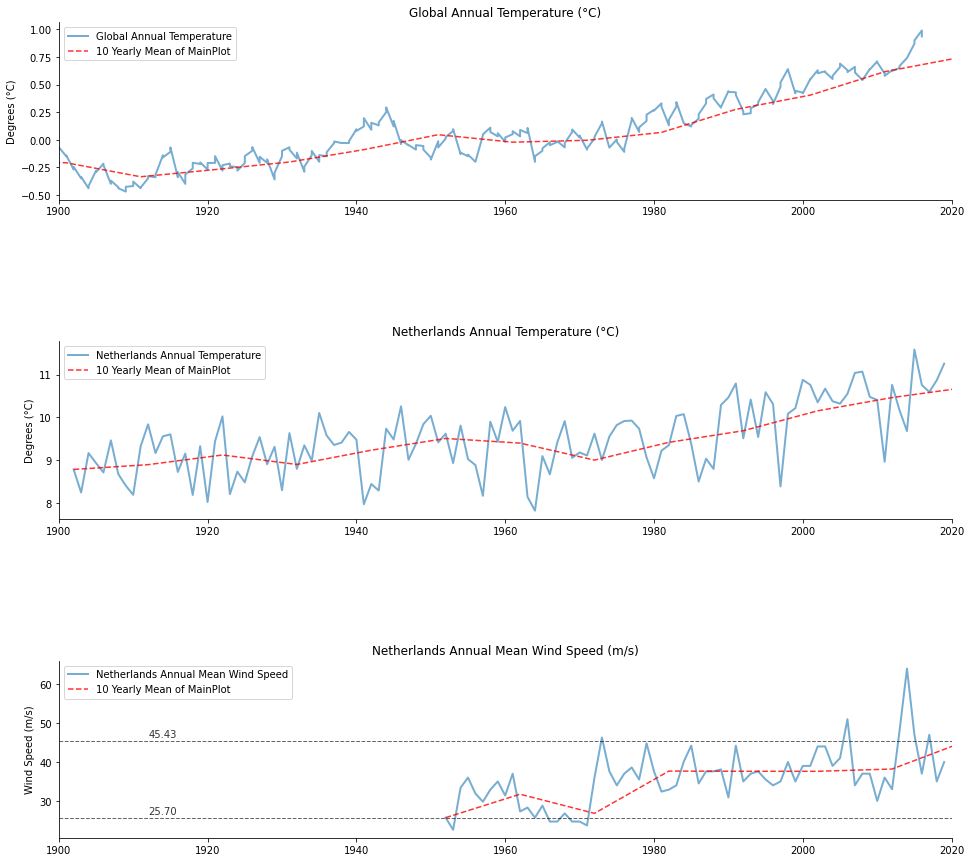

In [15]:
%matplotlib inline
mainalpha = 0.6
alpha = 0.8
plt.figure(figsize=(16,15))
plt.subplots_adjust(hspace=0.8)
ax1= plt.subplot(311)

# First Subplot: Global annual Temp + 10Yearly mean temp
plt.plot(glob['Year'], glob['Mean'], '-', label='Global Annual Temperature',
         linewidth=2, alpha=mainalpha )

plt.plot(globalTenYear['Year'] , globalTenYear['Mean'],
         '--r', label='10 Yearly Mean of MainPlot',alpha=alpha)

plt.title('Global Annual Temperature (°C)')
plt.xlim([pd.to_datetime('1900-01-01'),pd.to_datetime('2020-01-01')])
plt.ylabel('Degrees (°C)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.legend()

#Second Subplot: Netherlands Annual Temperature + 10Yearly mean temp
ax2= plt.subplot(312)
plt.plot(annualNetherlands['date'],annualNetherlands['meanTemp'],
         '-',label='Netherlands Annual Temperature',linewidth=2,alpha=mainalpha)

plt.plot(tenyearavg['date'] , tenyearavg['meanTemp'], 
         '--r', label='10 Yearly Mean of MainPlot',alpha=alpha)

plt.xlim([pd.to_datetime('1900-01-01'),pd.to_datetime('2020-01-01')])
plt.title('Netherlands Annual Temperature (°C)')
plt.ylabel('Degrees (°C)')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.legend()

# Third Subplot: Netherlands Annual Mean Wind Speed + 10Yearly mean
ax3= plt.subplot(313)
plt.plot(annualNetherlands['date'],annualNetherlands['meanwind'],'-',
         label='Netherlands Annual Mean Wind Speed', linewidth=2,alpha=mainalpha)
plt.plot(tenyearavg['date'] , tenyearavg['meanwind'],
         '--r',  label='10 Yearly Mean of MainPlot',alpha=alpha)
plt.xlim([pd.to_datetime('1900-01-01'),pd.to_datetime('2020-01-01')])
plt.title('Netherlands Annual Mean Wind Speed (m/s)')
plt.ylabel('Wind Speed (m/s)')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# two horizantal lines on third subplot to compare first and last mean wind speed
plt.axhline(y=tenyearavg.iloc[-1]['meanwind'],lw=1, color='black',
            linestyle='--',alpha = alpha-0.2)
plt.annotate("{0:.2f}".format(tenyearavg.iloc[-1]['meanwind']),
             xy = (tenyearavg.iloc[1]['date'],tenyearavg.iloc[-1]['meanwind']+1)
             ,alpha= alpha)
plt.axhline(y=tenyearavg.dropna().iloc[0]['meanwind'],lw=1, color='black',
            linestyle='--',alpha = alpha-0.2)
plt.annotate("{0:.2f}".format(tenyearavg.dropna().iloc[0]['meanwind']),
             xy = (tenyearavg.iloc[1]['date'],
                   tenyearavg.dropna().iloc[0]['meanwind']+1),alpha= alpha)
plt.legend()

plt.savefig('PLOT.jpg')

### *So, according to the Visualization, Yes, climate change actually affect hurricanes...*

#### Thanks for reading! ;)